# PROJECT 1
#Data Analysis
"AIR TRAFFIC ANALYTICS: NAVIGATING PERFORMANCE AND DELAY FACTORS IN US DOMESTIC FLIGHTS"


The primary goal is to create an interactive dashboard for analyzing extensive domestic flight data, including major airlines' on-time performance, delays, cancellations, and diversions. It seeks to uncover hidden patterns and trends, enabling users to identify recurring issues, understand cancellation reasons, and recognize overall performance trends. Categorizing delays based on factors like weather and technical issues is crucial for addressing challenges in the air travel system. The dashboard will evaluate the overall effectiveness of U.S. air travel by assessing punctuality, disruption frequency, and airline reliability, benefiting stakeholders such as airlines, travelers, and policymakers.

Project visualized by: GROUP 3
*   Janani Karthikeyan
*   Kruthika Srinivas Vasisht
*   Sneha Manjunath Chakrabhavi

Presented to:
Professor Satwik Kamarthi









## Basics of Dataset

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Set working directory
%cd /content/drive/MyDrive/PROJECT 1/dataset

/content/drive/MyDrive/PROJECT 1/dataset


In [42]:
#Find the size of your dataset (number of features and observations)
import pandas as pd
df = pd.read_csv('flights_sample_3m.csv')
num_rows, num_columns = df.shape
print(f"Number of Observations (Rows): {num_rows}")
print(f"Number of Features (Columns): {num_columns}")

Number of Observations (Rows): 3000000
Number of Features (Columns): 32


In [43]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [44]:
#Add summary statistics of your dataset here
summary_statistics = df.describe()
print(summary_statistics)

           DOT_CODE     FL_NUMBER  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  \
count  3.000000e+06  3.000000e+06  3.000000e+06  2.922385e+06  2.922356e+06   
mean   1.997629e+04  2.511536e+03  1.327062e+03  1.329776e+03  1.012333e+01   
std    3.772846e+02  1.747258e+03  4.858789e+02  4.993101e+02  4.925183e+01   
min    1.939300e+04  1.000000e+00  1.000000e+00  1.000000e+00 -9.000000e+01   
25%    1.979000e+04  1.051000e+03  9.150000e+02  9.160000e+02 -6.000000e+00   
50%    1.993000e+04  2.152000e+03  1.320000e+03  1.323000e+03 -2.000000e+00   
75%    2.036800e+04  3.797000e+03  1.730000e+03  1.739000e+03  6.000000e+00   
max    2.045200e+04  9.562000e+03  2.359000e+03  2.400000e+03  2.966000e+03   

           TAXI_OUT    WHEELS_OFF     WHEELS_ON       TAXI_IN  CRS_ARR_TIME  \
count  2.921194e+06  2.921194e+06  2.920056e+06  2.920056e+06  3.000000e+06   
mean   1.664305e+01  1.352361e+03  1.462500e+03  7.678982e+00  1.490561e+03   
std    9.192901e+00  5.008727e+02  5.272368e+02  6.

## Distribution of Dataset

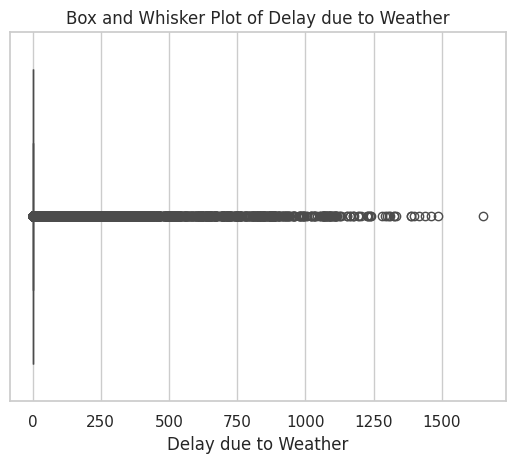

In [45]:
#Add at least one box and whisker plot of an important numerical variable in your table
#1
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['DELAY_DUE_WEATHER'])
plt.title('Box and Whisker Plot of Delay due to Weather')
plt.xlabel('Delay due to Weather')
plt.show()

INSIGHTS:

- Median weather-related delays are minimal, showing frequent short delays.
- The compact interquartile range points to consistent delay durations.
- Outliers indicate infrequent but substantial delays, possibly from severe weather.
- Planning should include strategies for typical short delays and occasional longer ones.

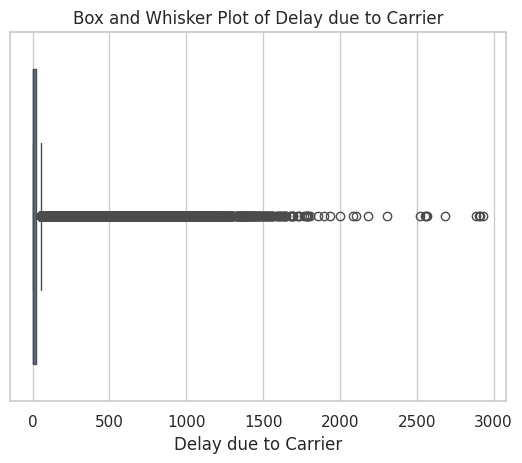

In [46]:
#2
sns.boxplot(x=df['DELAY_DUE_CARRIER'])
plt.title('Box and Whisker Plot of Delay due to Carrier')
plt.xlabel('Delay due to Carrier')
plt.show()

INSIGHTS:

- A broader interquartile range points to a more varied duration of delays from carriers.
- A scattering of outliers indicates that while rare, some delays can be exceptionally lengthy.
- Operational strategies should mainly address short delays, with contingencies for rare, longer disruptions.

<ipython-input-47-99be1529dd73>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


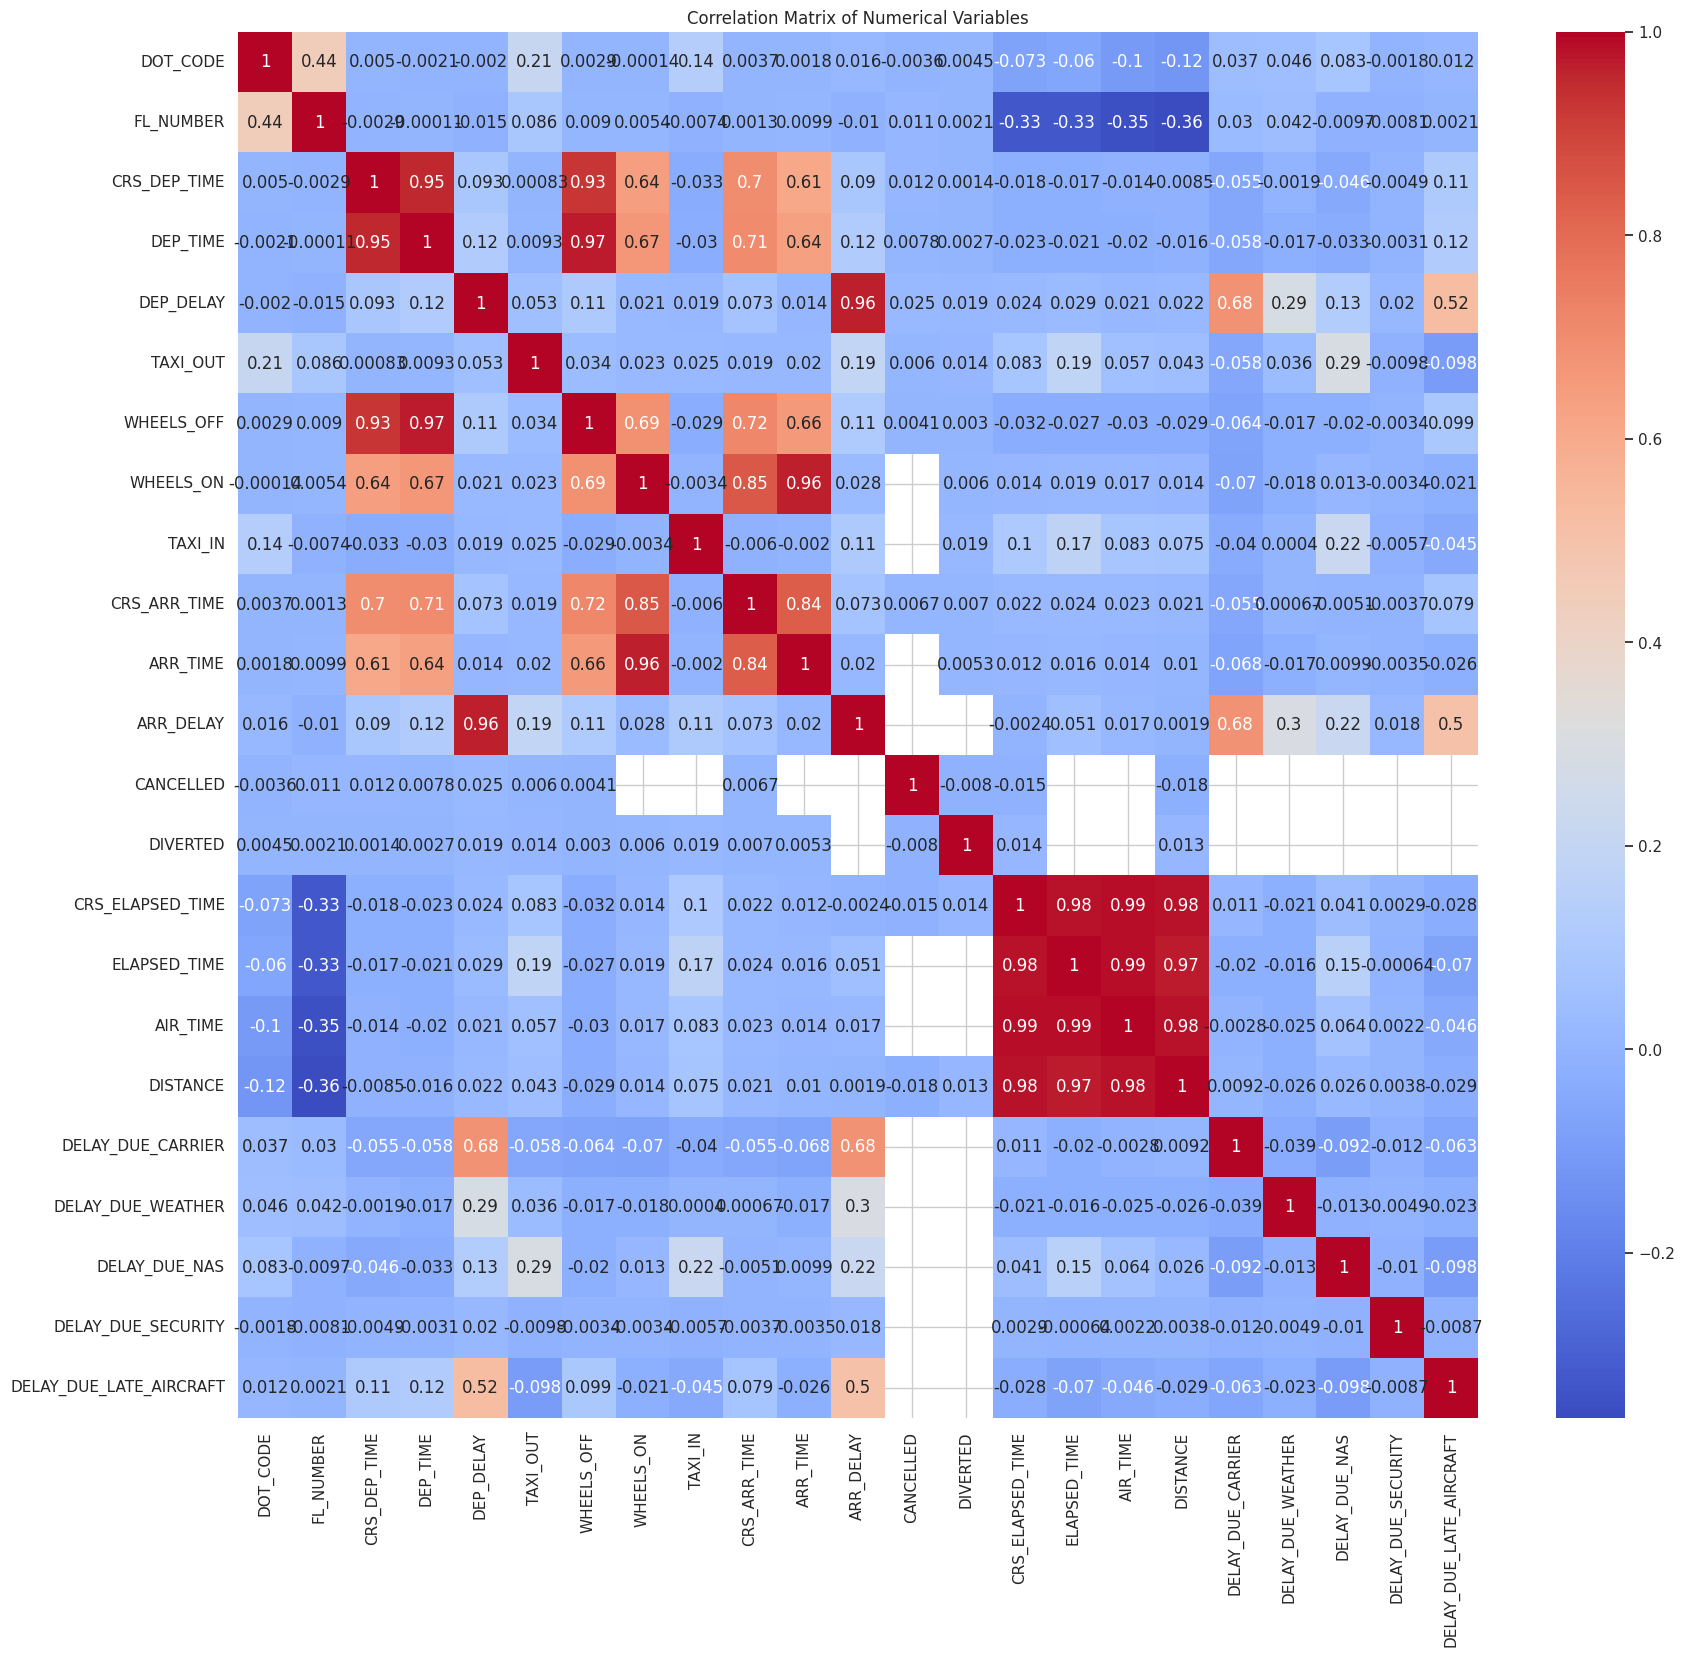

In [47]:
#Add a correlation matrix of all your numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Interpreting the correlation matrix involves examining the relationships between variable pairs:

1. **Strong Positive Relationships**: Actual flight duration and scheduled flight duration might show such a correlation, indicating that actual flight times align closely with scheduled times.

2. **Strong Negative Relationships**: Earlier scheduled departure times correlating with shorter delays, possibly indicating more efficient operations during earlier hours.

3. **Significance of Context**: A correlation between taxi time and departure delay might suggest that increased time on the runway could be a contributing factor to the subsequent delays.

4. **Correlation vs. Causation**: Correlation between arrival and departure delays doesn't necessarily mean one leads to the other; external factors could influence both.

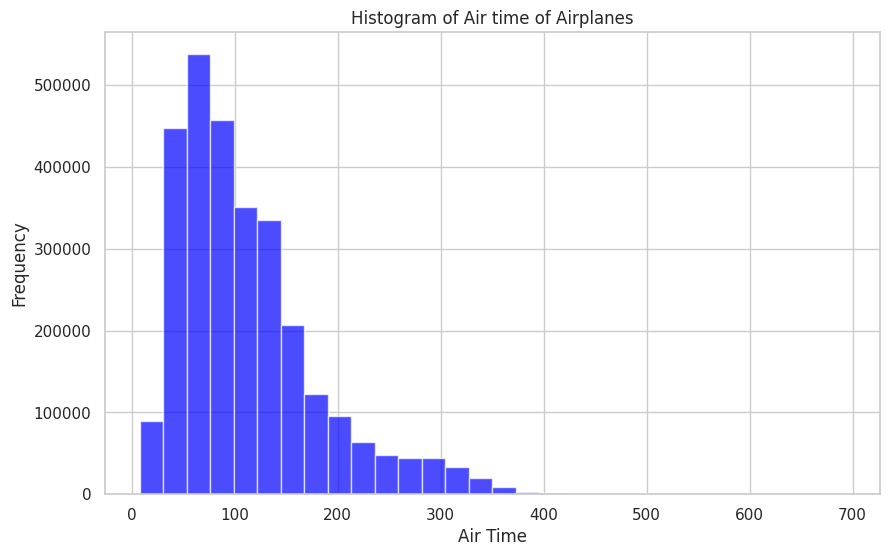

In [48]:
#BONUS: You can create a histogram to show distribution of a numerical variable

plt.figure(figsize=(10, 6))
plt.hist(df['AIR_TIME'], bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Air time of Airplanes')
plt.xlabel('Air Time')
plt.ylabel('Frequency')
plt.show()

INSIGHTS:

- The histogram outlines the frequency of flight durations.
- Short to mid-range flights, lasting 50 to 150 minutes, dominate the dataset.
- A decline in frequency is observed as flight duration increases, typical of air travel patterns.
- Flights over 300 minutes are sparse, indicating long-haul flights are uncommon in this sample.
- The right-skewed distribution points to a few flights with exceptionally long air times.
- The data implies a concentration on managing the prevalent shorter flights, which are most common.

<ipython-input-49-50f02e6435c1>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['ARR_DELAY'], shade=True, color="r", alpha=0.5)


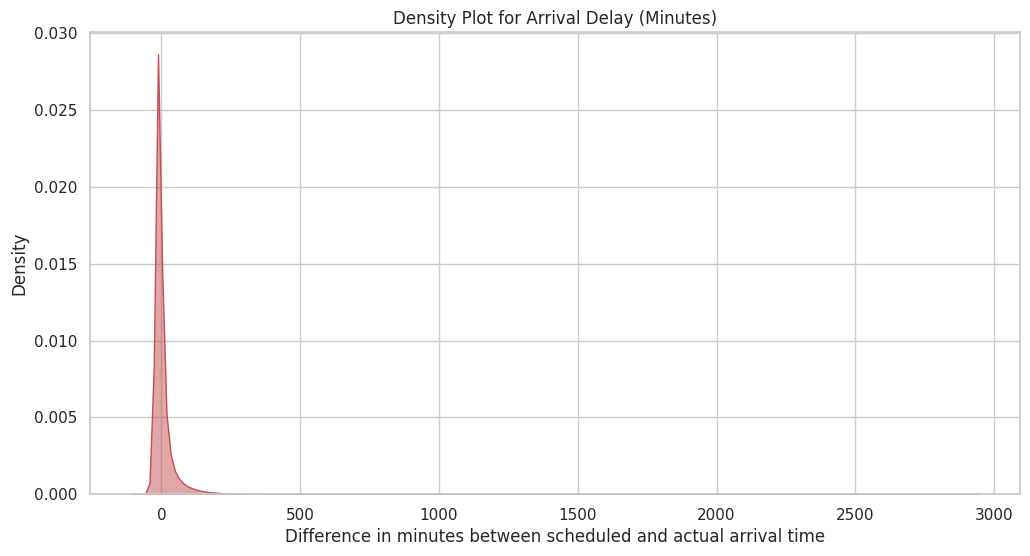

In [49]:
#BONUS: Include any other charts we learned in class on 01/30
#Density plot

plt.figure(figsize=(12, 6))
sns.kdeplot(x=df['ARR_DELAY'], shade=True, color="r", alpha=0.5)

plt.title('Density Plot for Arrival Delay (Minutes)')
plt.xlabel('Difference in minutes between scheduled and actual arrival time')
plt.ylabel('Density')

plt.show()


INSIGHTS:

- Density plot peaks near zero, indicating most arrivals are on time.
- Narrow peak shows limited variation in delays; system is generally punctual.
- Right-skewed distribution with a long tail suggests infrequent but significant delays.
- For operational efficiency, strategies to mitigate long delays could be beneficial.

## Aggregation of Categorical Data

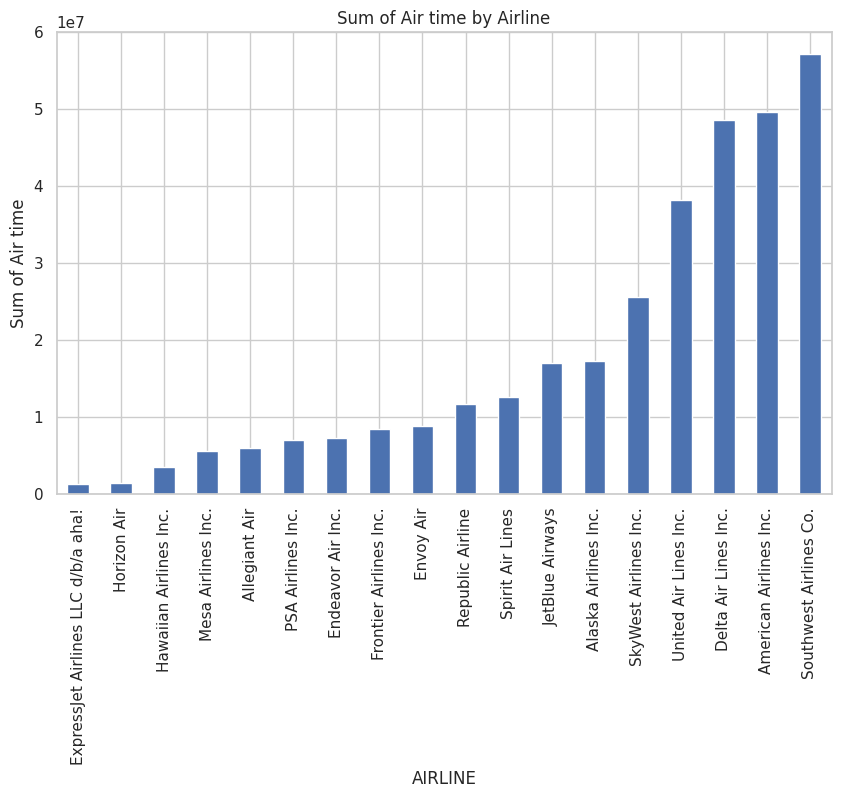

In [52]:
#Create either a bar chart or pie chart of the sum of one numerical value in relation to one categorical variable (i.e. sum of sales for each category of product)
category_sum = df.groupby('AIRLINE')['AIR_TIME'].sum().sort_values()

#Bar chart
category_sum.plot(kind='bar', figsize=(10, 6))
plt.title('Sum of Air time by Airline')
plt.xlabel('AIRLINE')
plt.ylabel('Sum of Air time')

# Show the plot
plt.show()


INSIGHTS:

- The Bar chart depicts the cumulative air time logged by various airlines.
- Southwest airlines far exceeds others in total air time, suggesting a larger operational footprint.
- Many airlines group at the lower end, indicating a competitive field with similar operational levels.


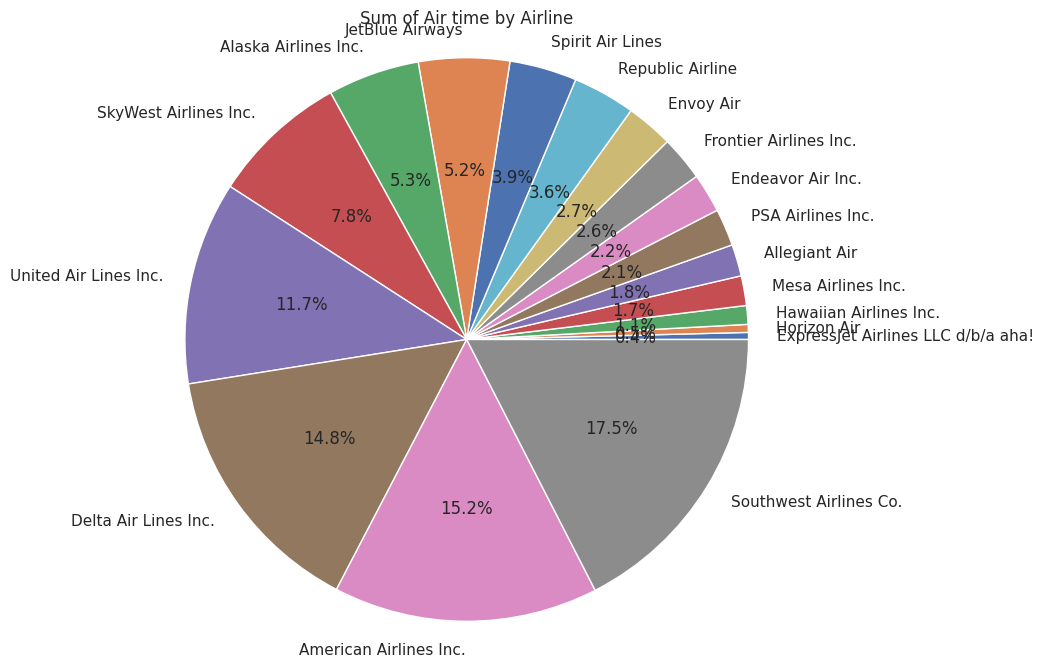

In [56]:
#Pie chart
category_sum.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')

plt.axis('equal')
plt.title('Sum of Air time by Airline')
plt.ylabel('')
plt.show()

INSIGHTS:

- Southwest Airlines Co. holds the largest share with 17.5%, indicating it has the most air time among the depicted carriers.
- American Airlines Inc. and Delta Air Lines Inc. follow with 15.2% and 14.8% respectively, forming the top three airlines in terms of air time.
- United Air Lines Inc. also has a significant portion at 11.7%.
- The remaining airlines each hold less than 10% of the total air time, with several smaller carriers representing minor shares, as low as 0.9%.


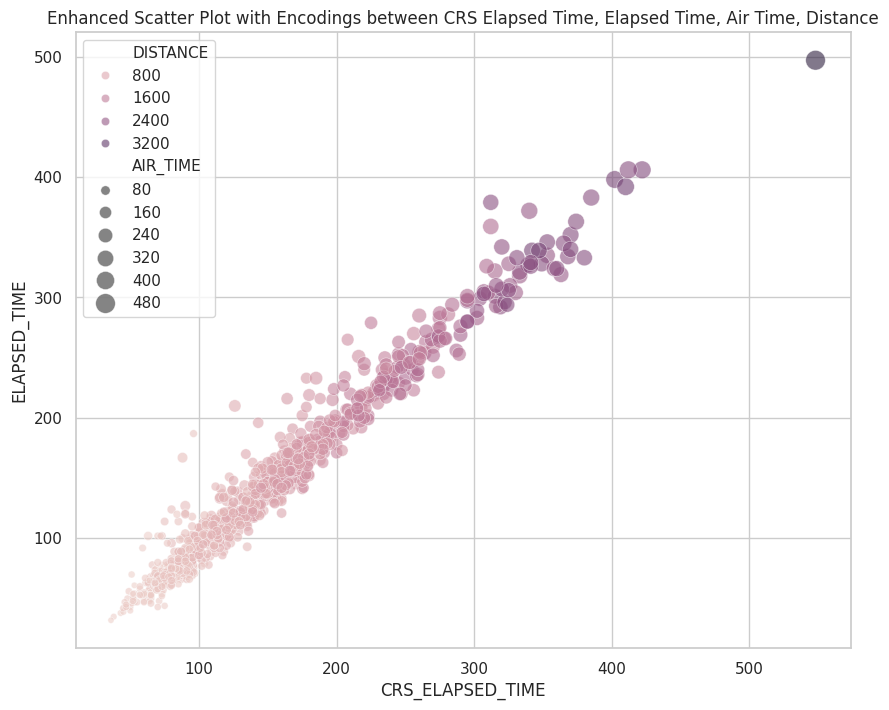

In [60]:
#BONUS: Create a scatterplot with more than 2 visual encodings

first_1000_rows = df.head(1000)
x_variable = 'CRS_ELAPSED_TIME'
y_variable = 'ELAPSED_TIME'
size_variable = 'AIR_TIME'
hue_variable = 'DISTANCE'

#Scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=first_1000_rows, x=x_variable, y=y_variable, size=size_variable, hue=hue_variable, sizes=(20, 200), alpha=0.6)
plt.title('Enhanced Scatter Plot with Encodings between CRS Elapsed Time, Elapsed Time, Air Time, Distance')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.show()


INSIGHTS:

- The scatter plot suggests several trends between the scheduled and actual flight times, as well as how distance and air time relate to these variables.
- A direct and proportional link exists between the planned and real-time durations of flights, indicating predictability in scheduling.
- Marker sizes on the plot denote air time, with bigger markers corresponding to extended durations in the air, aligning with increased elapsed times.
- Color depth signifies travel distance, with darker tones denoting longer trips. These tones become darker along the line of best fit, showing that longer trips usually have lengthier air and elapsed times.
- Outliers are visible where the actual time far exceeds the scheduled time, hinting at possible delays or extended flights.


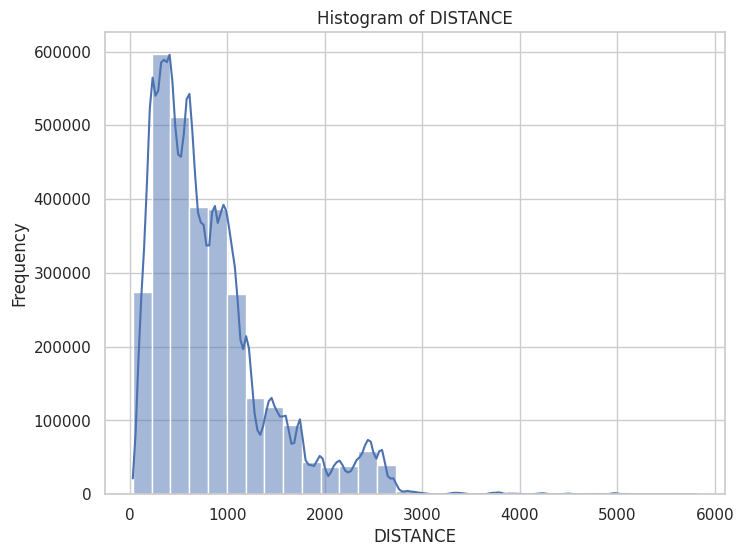

In [61]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df[hue_variable], bins=30, kde=True)
plt.title('Histogram of ' + hue_variable)
plt.xlabel(hue_variable)
plt.ylabel('Frequency')
plt.show()

INSIGHTS:

- The histogram shows a distribution of travel distances of airlines.
- Shorter journeys dominate the dataset, as indicated by the higher frequency of smaller distance values.
- Multiple peaks appear, possibly reflecting common travel lengths or favored flight routes.
- As travel distance grows, the occurrence of such trips diminishes, implying long-distance travels are rarer.
- The distribution extends with a tapering tail toward higher distances, signifying infrequent but existent long-haul trips.


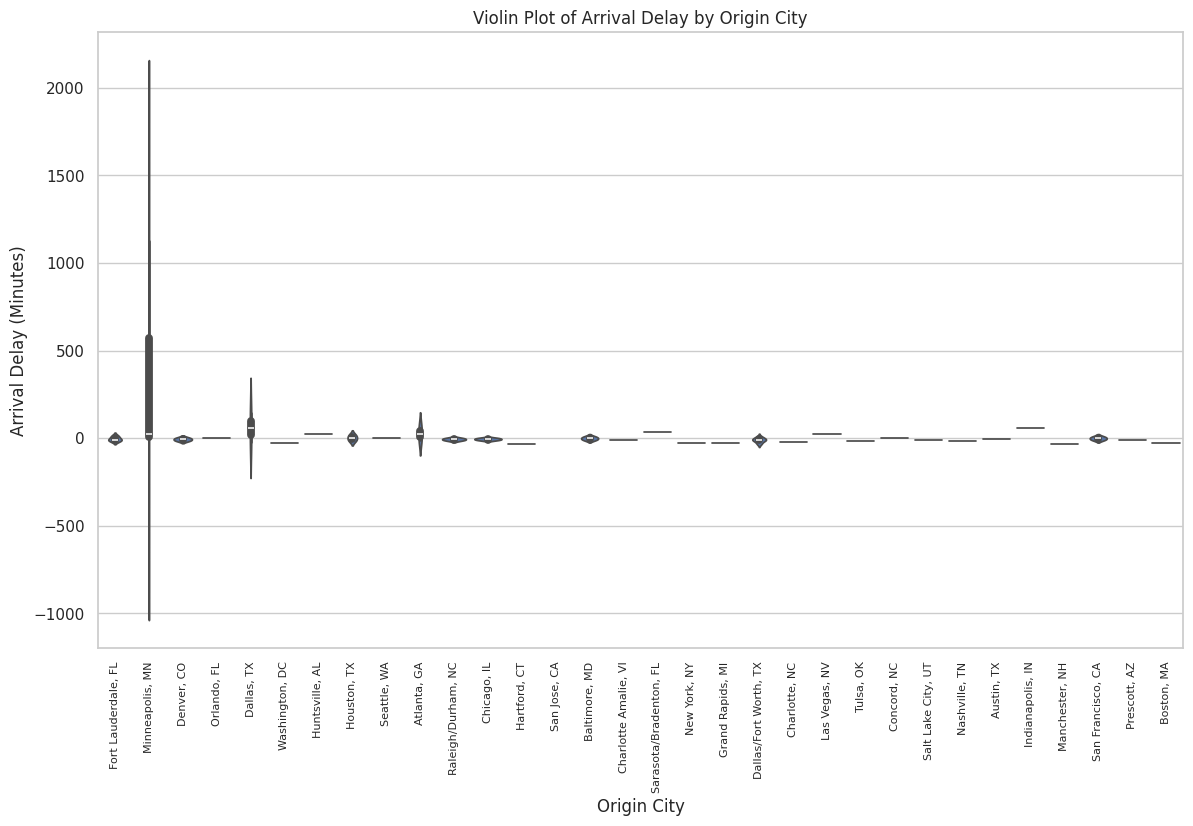

In [74]:
#BONUS: Include any other charts we learned in class on 01/30
#Violin chart

first_50_rows = df.head(50)
plt.figure(figsize=(14, 8))
sns.violinplot(x='ORIGIN_CITY', y='ARR_DELAY', data=first_50_rows)
plt.xticks(rotation=90, fontsize=8)
plt.title('Violin Plot of Arrival Delay by Origin City')
plt.xlabel('Origin City')
plt.ylabel('Arrival Delay (Minutes)')
plt.show()

INSIGHTS:

- The violin plot provides a visual summary of arrival delays by origin city.
- Delays are mostly clustered near zero, pointing to punctual arrivals for most flights.
- Instances of negative delay values hint at flights arriving earlier than scheduled in some cities.
- An upward stretch in the violin for Minneapolis, MN suggests an occurrence of a notably high delay.
- Symmetry around the zero line in several violins indicates a balance between early and late arrivals.
- The data largely hovers around the median, showing that substantial delays are relatively rare across the sampled cities.

## Insights & Trends

Key conclusions of our dataset based on our analysis above.

Reviewing the charts yields the following conclusions and investigative leads:

1. **Analysis of Delays**: The box plots for weather and carrier-induced delays predominantly show minor disruptions, but the presence of outliers indicates occasional severe delays. Identifying the root causes behind these anomalies would be an informative exercise.

2. **Flight Duration Trends**: The histogram for flight durations points to a concentration around median air times, with extreme long or short flights being less frequent. Examining the variables that affect flight duration might lead to more efficient route management.

3. **Patterns in Arrival Punctuality**: The density plot for arrival times mostly hovers near the scheduled times, suggesting reliability in arrivals, but also underlines the need for strategies to manage the tail of the distribution where delays occur.

4. **Airline Operation Scales**: The summary of air time by airline indicates market dominance by a select few. This has broader implications for understanding competitive dynamics and could influence strategic route planning.

These patterns could guide the development of models to predict flight delays, scrutinize efficiency factors for air time, and evaluate the airline market dynamics. Such analyses could offer substantial benefits to airline strategic planning, operational efficiency, and consumer relations.